# Image Processing

**Image Properties**

**Color conversions**

**Bounding rectangles**

**Thresholding and masking**


**Library imports**

In [0]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

**Colab file upload**

In [0]:
from google.colab import files
file=files.upload()

Saving lena.jpg to lena.jpg
Saving LOGO.jpg to LOGO.jpg
Saving photo1.jpg to photo1.jpg


**List of files uploaded**

In [0]:
!ls

lena.jpg  LOGO.jpg  photo1.jpg	sample_data


**Image properties**

In [0]:
# read an image
img = cv2.imread('lena.jpg')

# show image format (basically a 3-d array of pixel color info, in BGR format)
# get dimensions of image
img_shape = img.shape
 
# Image height, width and number of channels
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
 
print'Image Shape= ',img_shape
print'Height ',height
print'Width ',width
print'Number of Channels ',channels

Image Shape=  (494, 494, 3)
Height  494
Width  494
Number of Channels  3


**Manipulating image sizes**

In [0]:
img = cv2.resize(img,(512,512),cv2.INTER_CUBIC)
print 'New image shape ',img.shape

New image shape  (512, 512, 3)


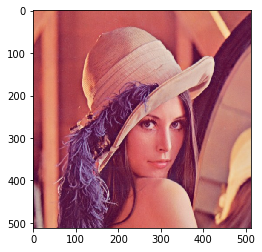

In [0]:
# cv2 uses BGR and RGB is used for matplotlib
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show image with matplotlib
plt.imshow(img1)

**Drawing a shape (other shapes like polygons or circles also possible)**

cv2.rectangle(image,(top left), (bottom right), (color), thickness)

definition: cv2.putText(image, 'text', org, font, fontScale, color, thickness, cv2.LINE_AA) 

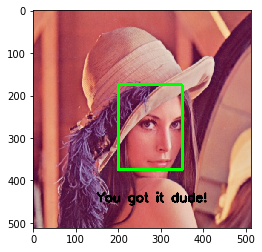

In [0]:
rect=cv2.rectangle(img1,(200,175),(350,375),(0,255,0),5)
font = cv2.FONT_HERSHEY_SIMPLEX
#image = 
cv2.putText(rect,'You got it dude!',(150,450), font, 1, (0,0, 0), 3, cv2.LINE_AA)
plt.imshow(rect)

**ROI or Region of Image to identify area of interest**

Each image has pixels in the form of rows and columns. These pixels have a definite coordinate location and color values

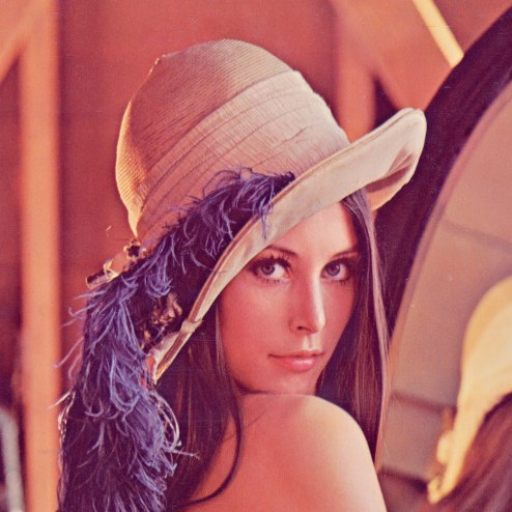

In [0]:
#Original image
cv2_imshow(img)

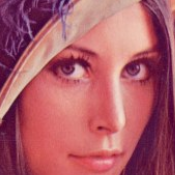

In [0]:
#ROI
face_snip=img[200:375,200:375]
cv2_imshow(face_snip)
#plt.axis('off')

**Superimposing**

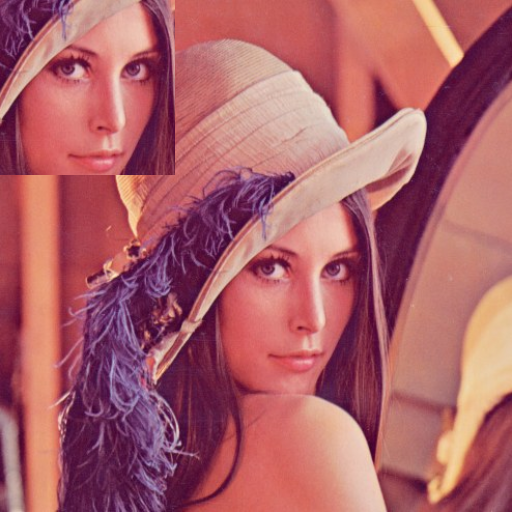

In [0]:
img[0:175, 0:175]= face_snip

cv2_imshow(img)

**Superimposing different images**

In [0]:
#Image with a face
img2 = cv2.imread('lena.jpg')
#Logo image
img3 = cv2.imread('LOGO.jpg')

#Intercubic for upsampling
img2=cv2.resize(img2,(512,512),cv2.INTER_CUBIC)

#Interlinear for downsampling
img3=cv2.resize(img3,(128,128),cv2.INTER_LINEAR)

In [0]:
print "Lena image shape ", img2.shape
print "Logo image shape ", img3.shape

Lena image shape  (512, 512, 3)
Logo image shape  (128, 128, 3)


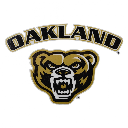

In [0]:
#Display image2 
cv2_imshow(img3)

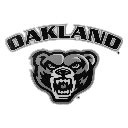

In [0]:
# To put logo on top-left corner, let's define the ROI
rows,cols,channels = img3.shape
roi = img2[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask
gray = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

**Threshold function requires (gray_img, threshold, max value).**

For pixel values smaller than the threshold they are set to 0. Other values are set to the maximum.

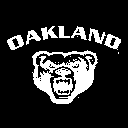

In [0]:
# add a threshold
ret, mask = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(mask)

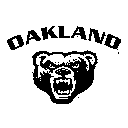

In [0]:
mask_inv = cv2.bitwise_not(mask)
cv2_imshow(mask_inv)

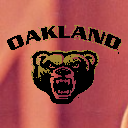

In [0]:
img2_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
cv2_imshow(img2_bg)


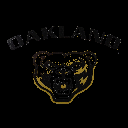

In [0]:
# Take only region of logo from logo image.
img3_fg = cv2.bitwise_and(img3,img3,mask = mask)
cv2_imshow(img3_fg)

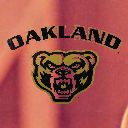

In [0]:
dst = cv2.add(img2_bg,img3_fg)
cv2_imshow(dst)


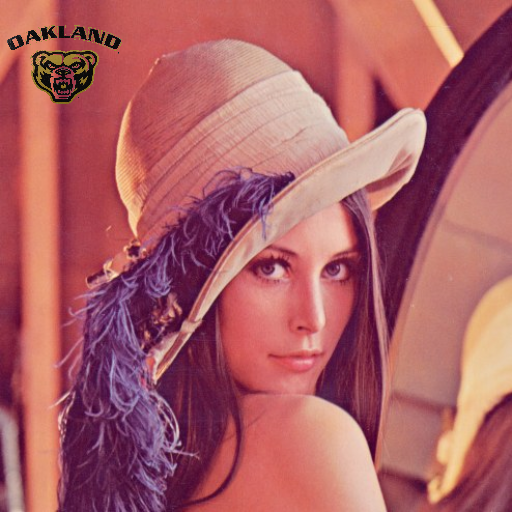

In [0]:
img2[0:rows, 0:cols ] = dst
cv2_imshow(img2)